# Analyzing The Gender Gap In College Degrees

In this project,I have analyzed the the gender gap in college degrees including STEM and non-stem majors.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.shape

(42, 18)

In [3]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


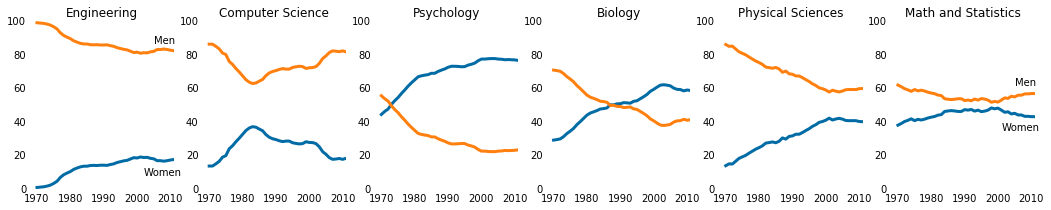

In [10]:

fig = plt.figure(figsize=(18, 3))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']


for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()


From the above data it is seen that the dataset contains 17 majors. So for our comfortness lets categorize the college majors into three parts.

1.Stem majors

2.liberal_arts

3.others_cats

In [11]:
stem = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics', 'Physical Sciences', 'Psychology']
lib_arts = ['Art and Performance', 'Communications and Journalism', 'English', 'Foreign Languages', 'Social Sciences and History']
other = ['Agriculture', 'Architecture', 'Business', 'Education', 'Health Professions', 'Public Administration']

stem_sorted = women_degrees[stem].sort_values(women_degrees[stem].shape[0]-1 , axis=1, ascending=False)
lib_arts_sorted = women_degrees[lib_arts].sort_values(women_degrees[lib_arts].shape[0]-1 , axis=1, ascending=False)
other_sorted = women_degrees[other].sort_values(women_degrees[other].shape[0]-1 , axis=1, ascending=False)

# Creating sorted list of degree categories
stem_cats = list(stem_sorted.columns)
liberal_arts_cats = list(lib_arts_sorted.columns)
others_cats = list(other_sorted.columns)

In [12]:
print(stem_cats)
print(liberal_arts_cats)
print(others_cats)

['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']


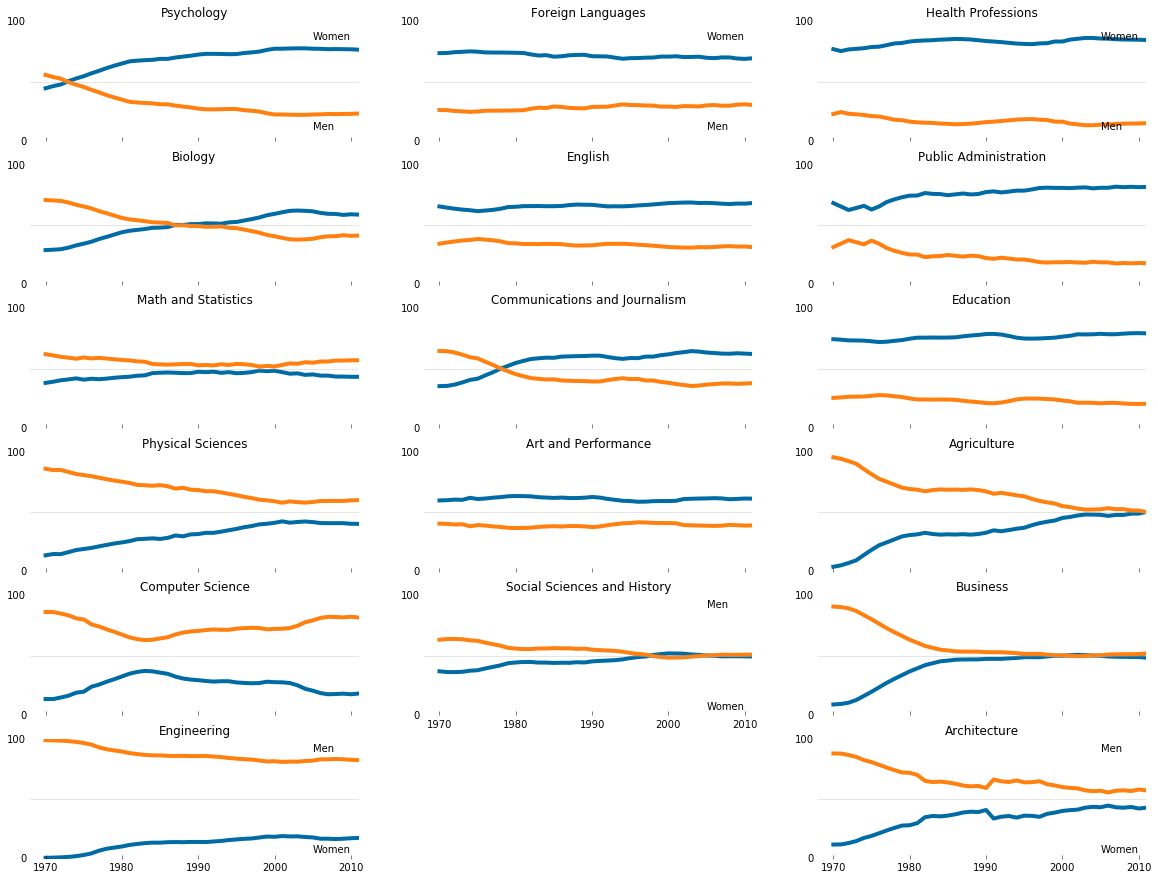

In [15]:
fig = plt.figure(figsize=(20, 15))
for sp in range(0,18,3):
    index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'],women_degrees[stem_cats[index]],c= cb_dark_blue,label='Women',linewidth=4)
    ax.plot(women_degrees['Year'],100-women_degrees[stem_cats[index]],c=cb_orange,label='men',linewidth=4)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    ax.tick_params(right='off', left='off', labelbottom='off', top='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if index == 0:
        ax.text(2005, 10, 'Men')
        ax.text(2005, 85, 'Women')
    if index == 5:
        ax.text(2005, 90, 'Men')
        ax.text(2005, 5, 'Women')
        ax.tick_params(labelbottom='on')

for sp in range(1,16,3):
    index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'],women_degrees[liberal_arts_cats[index]],c=cb_dark_blue,label='Women',linewidth=4)
    ax.plot(women_degrees['Year'],100-women_degrees[liberal_arts_cats[index]],c=cb_orange,label='Men',linewidth=4)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(liberal_arts_cats[index])
    ax.tick_params(right='off', left='off', labelbottom='off', top='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if index == 0:
        ax.text(2005, 10, 'Men')
        ax.text(2005, 85, 'Women')
    if index == 4:
        ax.text(2005, 90, 'Men')
        ax.text(2005, 5, 'Women')
        ax.tick_params(labelbottom='on')

for sp in range(2,20,3):
    index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'],women_degrees[others_cats[index]],c=cb_dark_blue,label='Women',linewidth=4)
    ax.plot(women_degrees['Year'],100-women_degrees[others_cats[index]],c=cb_orange,label='Men',linewidth=4)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(others_cats[index])
    ax.tick_params(right='off',left='off',labelbottom='off',top='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if index == 0:
        ax.text(2005, 10, 'Men')
        ax.text(2005, 85, 'Women')
    if index == 5:
        ax.text(2005, 90, 'Men')
        ax.text(2005, 5, 'Women')
        ax.tick_params(labelbottom='on')


fig.savefig('gender_gaps_college.png', dpi=300) 

# Conclusion

From the above data it is seen that the gender gap still exist in most of the major.On the category of STEM Major,Engineering,computer science and pyschology majors have hunge gender gap.Men outperformed the women in those majors.Whereas In the major like Argiculture,Business,Math and statistics, the gender gap is decreasing over time.